# Introduction:  Capstone Project Part 3

In this project, The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

In the first two parts of this project, we implemented the first 6 steps of the machine learning pipeline:

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the extent possible
8. Draw conclusions and write a well-documented report

In this notebook, we will concentrate on the last two steps.

### Imports

We will use a familiar stack of data science and machine learning libraries.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 12

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

sns.set(font_scale = 2)

import warnings
warnings.filterwarnings("ignore")

# Machine Learning Models
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, f1_score,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score

from scipy import stats

### Read in Data

In [2]:
# Note: Please edit this section to include output from Part 2 ie Smote data
final_X=pd.read_csv("data/training_features.csv")
SMOTE_X = pd.read_csv("data/SMOTE_training_features.csv")
final_X_test=pd.read_csv("data/testing_features.csv")
final_y=pd.read_csv("data/training_labels.csv")
SMOTE_Y = pd.read_csv("data/SMOTE_training_labels.csv")
final_y_test=pd.read_csv("data/testing_labels.csv")

## Recreate Final Model - With SMOTE

In [106]:
model =LogisticRegression()
model.fit(SMOTE_X, SMOTE_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
#  Make predictions on the test set
ypred=model.predict(final_X_test)

print('Final Model Performance on the test set:')
print(' f1_score : ',f1_score(final_y_test,ypred))
print(' classification_report : ',classification_report(final_y_test,ypred))
print(' confusion_matrix : ',confusion_matrix(final_y_test,ypred))
print(' accuracy_score : ',accuracy_score(final_y_test,ypred))

Final Model Performance on the test set:
 f1_score :  0.5966416577349053
 classification_report :                precision    recall  f1-score   support

           0       0.98      0.86      0.92      7298
           1       0.45      0.89      0.60       940

   micro avg       0.86      0.86      0.86      8238
   macro avg       0.72      0.87      0.76      8238
weighted avg       0.92      0.86      0.88      8238

 confusion_matrix :  [[6274 1024]
 [ 105  835]]
 accuracy_score :  0.8629521728574897


## Recreate Final Model - Without SMOTE

In [3]:
model = LogisticRegression()
model.fit(final_X, final_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
#  Make predictions on the test set
ypred=model.predict(final_X_test)

print('Final Model Performance on the test set:')
print(' f1_score : ',f1_score(final_y_test,ypred))
print(' classification_report : ',classification_report(final_y_test,ypred))
print(' confusion_matrix : ',confusion_matrix(final_y_test,ypred))
print(' accuracy_score : ',accuracy_score(final_y_test,ypred))

Final Model Performance on the test set:
 f1_score :  0.5263157894736842
 classification_report :                precision    recall  f1-score   support

           0       0.93      0.98      0.95      7298
           1       0.69      0.43      0.53       940

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

 confusion_matrix :  [[7118  180]
 [ 540  400]]
 accuracy_score :  0.9126001456664239


### <font color= Blue>Predicted probabilities of  0 (Not Subscribed to Term Deposit) and 1 ( Yes: Subscribed to Term Deposit)  for the test data with a default classification threshold of 0.5 <font>


In [110]:
y_pred_prob=model.predict_proba(final_X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no ','Prob of yes'])
y_pred_prob_df.head()

,Prob of no,Prob of yes
0,0.983868,0.016132
1,0.780780,0.219220
2,0.974361,0.025639
3,0.976224,0.023776
4,0.868278,0.131722


### Lower The Threshold :
- Since the model is predicting Term  Deposit Subscription for bank marketing campaign, thus  too many type II errors ie False Negatives  is not advisable. 
- A False Negative ( ignoring the probability of subscription when there actualy is one - ie losing a customer) is more harmful for marketing than a False Positive in this case.
- Hence inorder to increase the sensitivity,  threshold can be lowered.

In [24]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=model.predict_proba(final_X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(final_y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])))
    print('f1-score: ',f1_score(final_y_test,y_pred2))
    print('roc_auc_score: ',roc_auc_score(final_y_test,y_pred2),'\n\n\n')
    
    

With 0.1 threshold the Confusion Matrix is  
 [[6131 1167]
 [  74  866]] 
 with 6997 correct predictions and 74 Type II errors( False Negatives) 

 Sensitivity:  0.9212765957446809 Specificity:  0.840093176212661
f1-score:  0.5825765220316179
roc_auc_score:  0.880684885978671 



With 0.2 threshold the Confusion Matrix is  
 [[6621  677]
 [ 219  721]] 
 with 7342 correct predictions and 219 Type II errors( False Negatives) 

 Sensitivity:  0.7670212765957447 Specificity:  0.9072348588654426
f1-score:  0.6167664670658682
roc_auc_score:  0.8371280677305937 



With 0.3 threshold the Confusion Matrix is  
 [[6883  415]
 [ 314  626]] 
 with 7509 correct predictions and 314 Type II errors( False Negatives) 

 Sensitivity:  0.6659574468085107 Specificity:  0.9431351055083584
f1-score:  0.6320040383644624
roc_auc_score:  0.8045462761584345 



With 0.4 threshold the Confusion Matrix is  
 [[7026  272]
 [ 440  500]] 
 with 7526 correct predictions and 440 Type II errors( False Negatives) 

 Se

### ROC Curve: for choosing the right threshold
- A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate ( true positives/ total  positives) versus the false positive rate ( false positives /total  negatives) for all possible choices of thresholds.
- A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. 
- The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

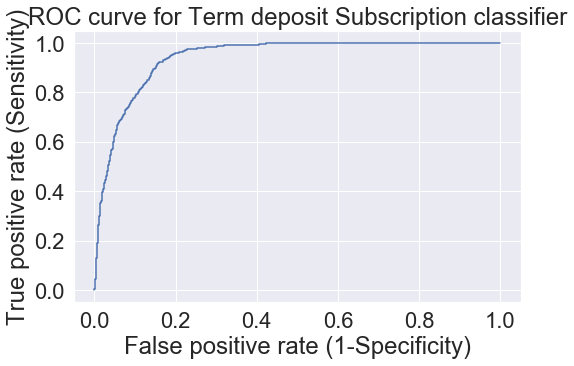

In [25]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,5))
fpr, tpr, thresholds = roc_curve(final_y_test,y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.title('ROC curve for Term deposit Subscription classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## Final Model Performance : 
Since Model built by lowering the threshold is performing better than model with SMOTE for handling imbalanced data . Thus, we will proceed with threshold shifted Logistic Regression model as our final model.

In [7]:
y_pred_prob_yes=model.predict_proba(final_X_test)
# Selecting threshold from confusion matrix and roc curve 
threshold=0.2
y_pred2=binarize(y_pred_prob_yes,threshold)[:,1]
print('Final Model Performance on the test set:')
print(' f1_score : ',f1_score(final_y_test,y_pred2))
print(' classification_report : ',classification_report(final_y_test,y_pred2))
print(' confusion_matrix : ',confusion_matrix(final_y_test,y_pred2))
print(' accuracy_score : ',accuracy_score(final_y_test,y_pred2))
print(' roc_auc_score : ',roc_auc_score(final_y_test,y_pred2))

Final Model Performance on the test set:
 f1_score :  0.6147260273972603
 classification_report :                precision    recall  f1-score   support

           0       0.97      0.91      0.94      7298
           1       0.51      0.76      0.61       940

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.74      0.84      0.78      8238
weighted avg       0.92      0.89      0.90      8238

 confusion_matrix :  [[6620  678]
 [ 222  718]]
 accuracy_score :  0.8907501820830298
 roc_auc_score :  0.8354638111286684


## Range Estimate of Model Performance:

In [3]:
full_X=pd.concat([final_X,final_X_test],axis=0)
full_y=pd.concat([final_y,final_y_test],axis=0)
full_data=pd.concat([full_X,full_y],axis=1)
print(full_data.shape)
full_data.head()

(41188, 40)


,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,-0.481846,-0.310570,-0.204850,-0.195584,0.643045,0.720048,0.883266,0.707515,0.326210,-0.354796,0.802986,-0.623938,-0.342753,-0.241443,-0.433723,1.780550,-0.020617,-0.393399,-0.665932,-1.320521,1.320521,-0.260639,-0.421558,-0.066713,-0.460893,-0.385544,-0.114038,1.414342,-0.332602,-0.132678,-0.116605,2.060172,-0.509325,-0.514472,-0.496393,-0.494303,-0.339649,0.398169,-0.185928,0
1,-1.730916,-0.009892,0.162686,-0.195584,-1.140950,1.101751,0.039589,-1.616536,-2.444456,-0.354796,-1.245352,1.602723,-0.342753,-0.241443,-0.433723,-0.561624,-0.020617,2.541949,-0.665932,0.757277,-0.757277,-0.260639,-0.421558,-0.066713,2.169701,-0.385544,-0.114038,-0.707042,-0.332602,-0.132678,-0.116605,-0.485396,-0.509325,-0.514472,2.014531,-0.494303,2.944219,-2.511495,-0.185928,1
2,-0.193599,-0.834829,0.897757,-0.195584,0.834187,1.533541,-0.284902,0.766454,0.841715,-0.354796,0.802986,-0.623938,-0.342753,-0.241443,2.305621,-0.561624,-0.020617,-0.393399,-0.665932,-1.320521,1.320521,-0.260639,-0.421558,-0.066713,-0.460893,2.593740,-0.114038,-0.707042,-0.332602,-0.132678,-0.116605,2.060172,-0.509325,-0.514472,-0.496393,-0.494303,-0.339649,0.398169,-0.185928,0
3,-1.442669,0.707109,-0.204850,-0.195584,0.834187,0.588783,-0.479597,0.768765,0.841715,-0.354796,-1.245352,1.602723,-0.342753,-0.241443,2.305621,-0.561624,-0.020617,-0.393399,-0.665932,0.757277,-0.757277,-0.260639,-0.421558,-0.066713,2.169701,-0.385544,-0.114038,-0.707042,-0.332602,-0.132678,-0.116605,-0.485396,-0.509325,-0.514472,-0.496393,2.023051,-0.339649,0.398169,-0.185928,0
4,-0.289682,-0.584264,0.530222,-0.195584,0.834187,-0.229892,0.948164,0.769343,0.841715,-0.354796,0.802986,-0.623938,-0.342753,-0.241443,-0.433723,-0.561624,-0.020617,-0.393399,1.501654,0.757277,-0.757277,-0.260639,2.372153,-0.066713,-0.460893,-0.385544,-0.114038,-0.707042,-0.332602,-0.132678,-0.116605,-0.485396,-0.509325,-0.514472,-0.496393,2.023051,-0.339649,0.398169,-0.185928,0


In [4]:
full_data.to_csv('full_data_scaled_encoded.csv',index=False)

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
# generating n train-test (bootstrap) samples from population data to estimate the model performance:
n_samples=100
sample_f1_scores=[]
sample_accuracy_scores=[]
sample_roc_auc_scores=[]
for i in range(n_samples):
    xtrain, xtest, ytrain, ytest= train_test_split(full_X, full_y,test_size=0.3, shuffle=True)
    model = LogisticRegression()
    
    model.fit(xtrain, ytrain)
    ypred=model.predict(xtest)
    y_pred_prob_yes=model.predict_proba(xtest)
    threshold=0.2
    y_pred2=binarize(y_pred_prob_yes,threshold)[:,1]

    sample_f1_scores.append(f1_score(ytest,y_pred2))
    sample_accuracy_scores.append(accuracy_score(ytest,y_pred2))
    sample_roc_auc_scores.append(roc_auc_score(ytest,y_pred2))

In [16]:
def confidence_interval(metric,sample):
    sns.distplot(sample)
    plt.show()
    lower_limit,upper_limit=stats.t.interval(alpha=0.05,loc=np.mean(sample),scale=np.std(sample),df=n_samples-1)
    print('Range estimate for ',metric,' at 95% confidence level is :',lower_limit,' to ', upper_limit)
    return((lower_limit,upper_limit))

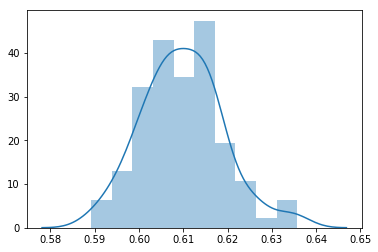

Range estimate for  f1_score  at 95% confidence level is : 0.6092813351483618  to  0.6104272869958246


In [17]:
ci_f1_score=confidence_interval('f1_score',sample_f1_scores)

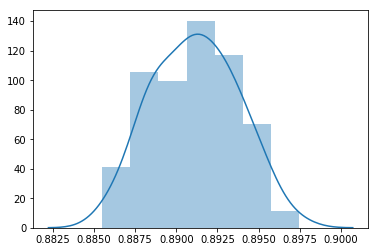

Range estimate for  accuracy_score  at 95% confidence level is : 0.8909820952716162  to  0.8913048675834457


In [21]:
ci_accuracy_score=confidence_interval('accuracy_score',sample_accuracy_scores)

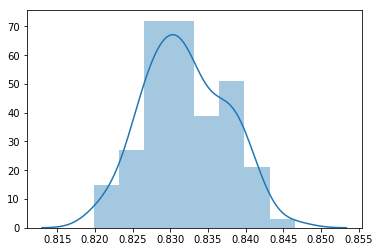

Range estimate for  roc_auc_score  at 95% confidence level is : 0.8316494989516454  to  0.8323272811606066


In [19]:
ci_roc_auc_score=confidence_interval('roc_auc_score',sample_roc_auc_scores)

# Interprete the Model

Machine learning is often [criticized as being a black-box](https://www.technologyreview.com/s/604087/the-dark-secret-at-the-heart-of-ai/): we put data in on one side and it gives us the answers on the other. While these answers are often extremely accurate, the model tells us nothing about how it actually made the predictions. This is true to some extent, but there are ways in which we can try and discover how a model "thinks".

We will explore several ways to interpret our model:

* Feature importances
* Examining a single decision tree in the ensemble.

### Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [102]:
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm
df_constant = add_constant(full_data)
df_constant.head()
cols=df_constant.columns[:-1]
model=sm.Logit(df_constant['y'],df_constant[cols])
result=model.fit(maxiter=1000)
#result.summary()

         Current function value: 0.208039
         Iterations: 1000


In [103]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())

conf['OR'] = params
conf['Probability']=params/(params+1)
conf['coeff']=result.params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['Odds_Ratio: CI 95%(2.5%)', 'Odds_Ratio: CI 95%(97.5%)', 'Odds Ratio','Probability','Coefficient','pvalue']
conf.head(10)

,Odds_Ratio: CI 95%(2.5%),Odds_Ratio: CI 95%(97.5%),Odds Ratio,Probability,Coefficient,pvalue
const,0.041621,0.046912,0.044187,0.042317,-3.119322,0.000
age,0.989893,1.073979,1.031079,0.507651,0.030606,0.141
duration,3.249947,3.504693,3.374917,0.771424,1.216371,0.000
campaign,0.843700,0.954177,0.897240,0.472919,-0.108432,0.001
pdays,1.091757,1.266625,1.175945,0.540430,0.162072,0.000
emp.var.rate,0.038630,0.092439,0.059757,0.056388,-2.817461,0.000
cons.price.idx,2.705660,4.792108,3.600808,0.782647,1.281158,0.000
cons.conf.idx,1.028955,1.184242,1.103871,0.524686,0.098823,0.006
euribor3m,1.175950,2.834273,1.825641,0.646098,0.601931,0.007
nr.employed,0.934327,2.246647,1.448828,0.591641,0.370755,0.098


 ### Insights :
- Duration , cons.price.idx come out as most important features, followed by age, euribor3m and other socio-economic features
- probability of customer subscribing to term deposit  given no predictors is 4.2%. In other words, the intercept from the model with no predictor variables is the estimated log odds of subscribing to term deposit for the whole population of interest. 
- probability of customers subscribing to term deposit with every one unit increase in call duration increases by 77%.
- The coefficient for age says that, holding all others constant, we will see 3% increase in the odds of subscring to term deposit for a one year increase in age since.**

- Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.** 
- Increase in cons.price.idx by one unit increases the probability of subscribing to term deposit by 78%

## Feature Importances

One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. These can be interpreted as the variables which are most predictive of the target. While the actual details of the feature importances are quite complex ([here is a Stack Overflow question on the subject](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined), we can use the relative values to compare the features and determine which are most relevant to our problem. 

Extracting the feature importances from a trained ensemble of trees is quite easy in scikit-learn. We will store the feature importances in a dataframe to analyze and visualize them.

In [86]:
# Extract the feature importances into a dataframe
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(full_X, full_y)
feature_results = pd.DataFrame({'feature': list(full_X.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head()

,feature,importance
0,duration,0.374080
1,nr.employed,0.156744
2,age,0.117835
3,euribor3m,0.087371
4,campaign,0.037950


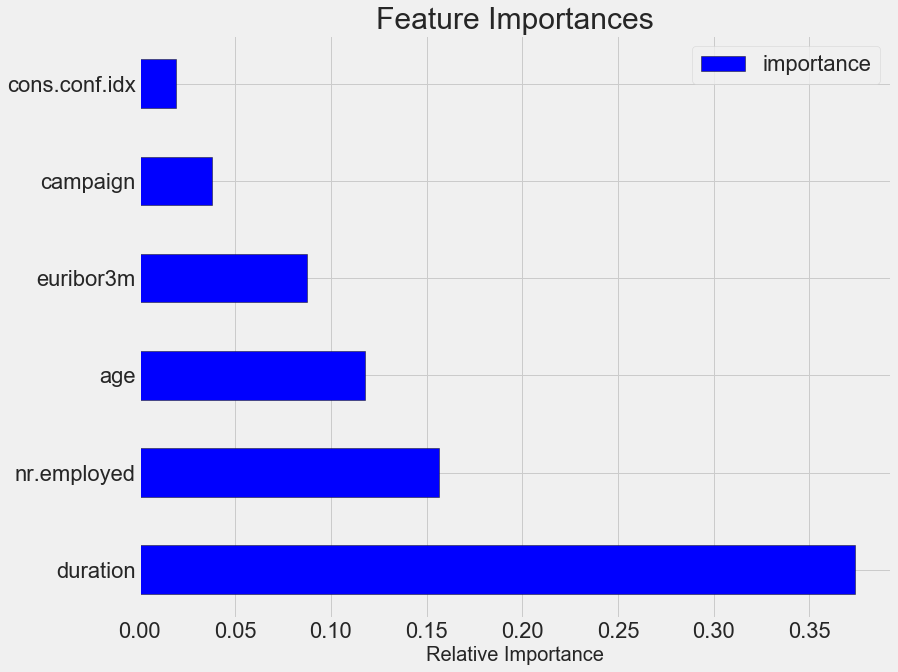

In [101]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:5, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances', size = 30);

### Inferences:
- Decision Tree Feature Importances shows similar results as logistic regression coefficeint interpretation:
- duration is the most important feature follwed by nr.employed	and age

#  Conclusions and Document Findings


1. Using the given Bank Marketing data, our machine learning model has increased the baseline model performance from:<br>
F1-score = 0.5263 to f1_score :  0.6147<br>
roc_auc_score = 0.7004 to roc_auc_score :  0.8354<br>
while consistently maintaing model accuracy. 
- Thus, our model can predict whteher a customer subscribed to term deposit or not with  89% accuracy.
2. The most important variables for determining the term deposit subscription are : Duration, nr.employed  and age.
3. From the statistical tests performed on 'job' ,  we can infer that most of the clients who say 'yes' for term subscription they are working as __RETIRED(25%)__ and __STUDENT(31%)__.
4. From the statistical tests performed on 'education', we can infer that most of the clients who say 'yes' for term subscription they are having __ILLITERATE(22%)__ and __UNIVERSITY.DEGREE(14%)__.
5. From the statistical tests performed on 'marital_status' ,we can infer that most of the clients who say 'yes' for term subscription they are having __SINGLE(14%)__ as marital status.
6. From the statistical tests performed on 'contact' type, we can infer that most of the clients who say 'yes' for term subscription their type of contact is __CELLULAR(15%)__.
7. From the statistical tests performed on 'month', we can infer that most of the clients who say 'yes' for term subscription they are last contacted in the month of __MARCH(51%)__ and __DECEMBER(49%)__.
8. Clients who say 'yes' for term subscription they are contacted in __TUESDAY__ and __THURSDAY__.
9. From the statistical tests performed on 'poutcome', we can infer that the clients who say 'yes' for term subscription their last campaign outcome was __SUCCESS(65%)__.
10. For Bank to focus on future marketing campaigns , it should target above mentioned class of customers for better success rate